## Exploratory Data Analysis


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [5]:
train = pd.read_csv("kc_house_data_train.csv", index_col = 0)
holdout = pd.read_csv("kc_house_data_test_features.csv", index_col = 0)
filledrooms = pd.read_csv("bedroomsfilled.csv", index_col = 0)

In [6]:
print(train.shape)
print(holdout.shape)
print(filledrooms.shape)
#train.drop(columns="Unnamed: 0", inplace = True)
train.head()

(17290, 21)
(4323, 20)
(12, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [7]:
#holdout.drop(columns="Unnamed: 0", inplace = True)
categorical = ("waterfront", "view", "grade", "yr_built", "floors")

In [8]:
filledrooms.shape

(12, 21)

In [9]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [10]:
def filled_data(df,df2):
    index=df.loc[df.bedrooms == 0].index.to_list()
    df.drop(df.index[[index]], inplace=True)
    frames= [df, df2]
    train = pd.concat(frames)
    return train


In [11]:
new_train = filled_data(train, filledrooms)

In [12]:
new_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9286,2954400190,20140624T000000,1295650.0,4,4.50,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,20140926T000000,142000.0,1,0.75,290,20875,1.0,0,0,...,1,290,0,1954,0,98024,47.5308,-121.888,1620,22850
10074,2310060040,20140925T000000,240000.0,4,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
13989,6896300380,20141002T000000,228000.0,2,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [14]:
new_train[new_train.index == 10067]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10067,3980300371,20140926T000000,142000.0,1,0.75,290,20875,1.0,0,0,...,1,290,0,1954,0,98024,47.5308,-121.888,1620,22850


In [10]:
new_train.shape

(17290, 21)

In [11]:
new_train.loc[new_train.id == 3374500520]
#train.drop(columns="Unnamed: 0", inplace = True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,4,2.5,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050


In [12]:
train.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283


In [13]:
corr=train.corr()

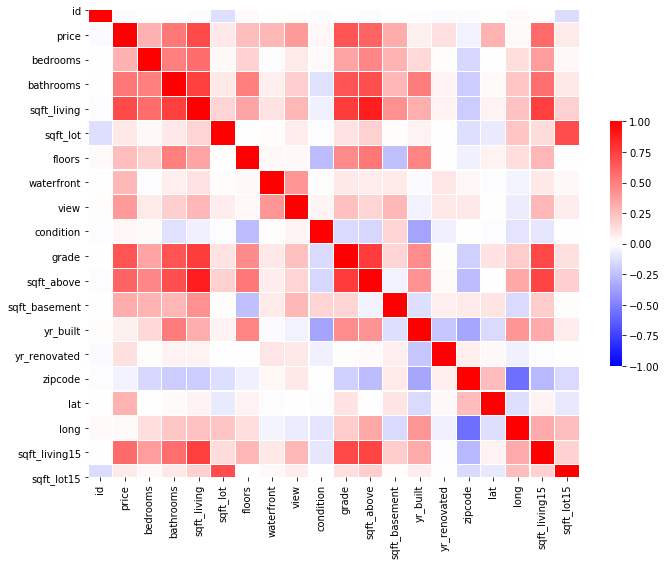

In [14]:

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="bwr", vmax=1,vmin=-1, center=0, square = True,
             linewidths=.1, cbar_kws={"shrink": .5})

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17278 entries, 0 to 17289
Data columns (total 21 columns):
id               17278 non-null int64
date             17278 non-null object
price            17278 non-null float64
bedrooms         17278 non-null int64
bathrooms        17278 non-null float64
sqft_living      17278 non-null int64
sqft_lot         17278 non-null int64
floors           17278 non-null float64
waterfront       17278 non-null int64
view             17278 non-null int64
condition        17278 non-null int64
grade            17278 non-null int64
sqft_above       17278 non-null int64
sqft_basement    17278 non-null int64
yr_built         17278 non-null int64
yr_renovated     17278 non-null int64
zipcode          17278 non-null int64
lat              17278 non-null float64
long             17278 non-null float64
sqft_living15    17278 non-null int64
sqft_lot15       17278 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.9+ MB


In [16]:
no_price = train.drop(columns=["price", "sqft_living", "sqft_above"])

In [17]:
def multicolinear_features(data):
    df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace = True)
    df.drop(columns=['level_1', 'level_0'], inplace = True)
    df.columns = ['cc']
    df.drop_duplicates(inplace=True)
    return df[(df.cc>.75) & (df.cc<1) ]

In [18]:
mcf_train = multicolinear_features(no_price)

In [19]:
mcf_train


,cc
pairs,


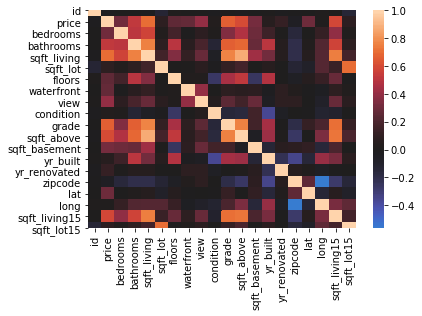

In [20]:
sns.heatmap(train.corr(), center=0);

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17278 entries, 0 to 17289
Data columns (total 21 columns):
id               17278 non-null int64
date             17278 non-null object
price            17278 non-null float64
bedrooms         17278 non-null int64
bathrooms        17278 non-null float64
sqft_living      17278 non-null int64
sqft_lot         17278 non-null int64
floors           17278 non-null float64
waterfront       17278 non-null int64
view             17278 non-null int64
condition        17278 non-null int64
grade            17278 non-null int64
sqft_above       17278 non-null int64
sqft_basement    17278 non-null int64
yr_built         17278 non-null int64
yr_renovated     17278 non-null int64
zipcode          17278 non-null int64
lat              17278 non-null float64
long             17278 non-null float64
sqft_living15    17278 non-null int64
sqft_lot15       17278 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.9+ MB


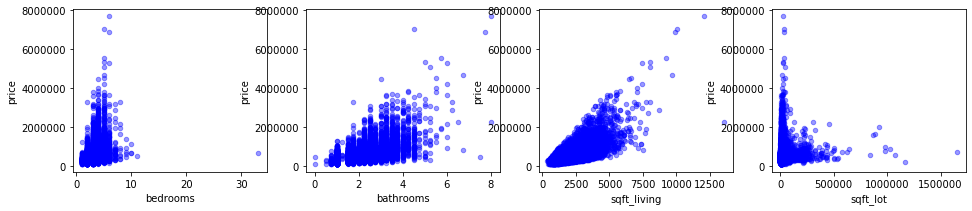

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    train.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

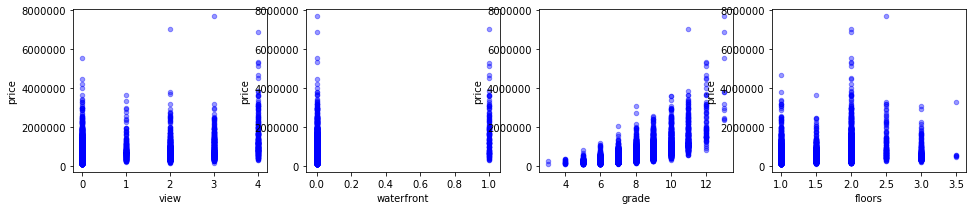

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['view', 'waterfront', 'grade', 'floors'], axes):
    train.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

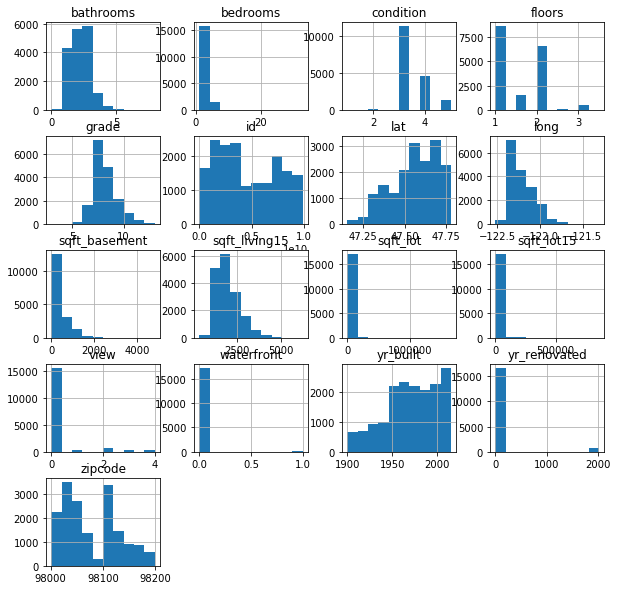

In [24]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
no_price.hist(ax = ax);

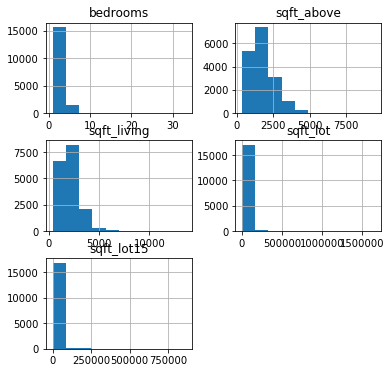

In [25]:
train[['sqft_lot', 'sqft_above', 'sqft_lot15', 'sqft_living','bedrooms']].hist(figsize  = [6, 6]); 

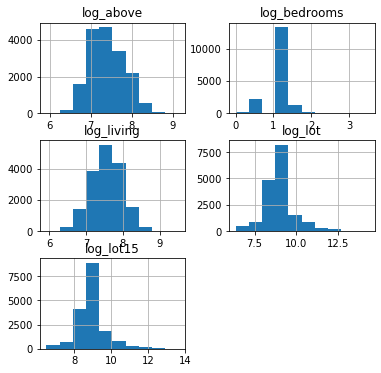

In [26]:
data_log = pd.DataFrame([])
data_log['log_bedrooms'] = np.log(train['bedrooms'])
data_log['log_above'] = np.log(train['sqft_above'])
data_log['log_living'] = np.log(train['sqft_living'])
data_log['log_lot'] = np.log(train['sqft_lot'])
data_log['log_lot15'] = np.log(train['sqft_lot15'])
data_log.hist(figsize  = [6, 6]);

In [27]:
categorical

('waterfront', 'view', 'grade', 'yr_built', 'floors')

In [28]:
log_above = data_log['log_above']
log_living = data_log['log_living']
log_lot = data_log['log_lot']
log_lot15 = data_log['log_lot15']
log_bedrooms = data_log['log_bedrooms'] 

scaled_bedrooms = (log_bedrooms - np.mean(log_bedrooms)) / np.sqrt(np.var(log_bedrooms))
scaled_above= (log_above - np.mean(log_above)) / np.sqrt(np.var(log_above))
scaled_living = (log_living - np.mean(log_living)) / np.sqrt(np.var(log_living))
scaled_lot = (log_lot - np.mean(log_lot)) / np.sqrt(np.var(log_lot))
scaled_lot15 = (log_lot15 - np.mean(log_lot15)) / (max(log_lot15) - min(log_lot15))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['std_bedrooms'] = scaled_bedrooms
data_cont_scaled['std_above'] = scaled_above
data_cont_scaled['std_living'] = scaled_living
data_cont_scaled['std_lot'] = scaled_lot
data_cont_scaled['mean_norm_lot15'] = scaled_lot15

waterfront_dummies = pd.get_dummies(train["waterfront"], prefix="wfront")
view_dummies = pd.get_dummies(train["view"], prefix="view")
grade_dummies = pd.get_dummies(train["grade"], prefix="grade")

price = train["price"]

data_fin = pd.concat([price, data_cont_scaled, waterfront_dummies, view_dummies, grade_dummies], axis=1)



In [29]:
data_fin.head()

,price,std_bedrooms,std_above,std_living,std_lot,mean_norm_lot15,wfront_0,wfront_1,view_0,view_1,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,365000.0,0.733197,0.561433,0.197604,0.105063,-0.002598,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,865000.0,1.518634,0.272854,0.993899,-0.204968,-0.030955,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1038000.0,0.733197,1.965367,1.613540,0.330732,0.029383,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1490000.0,-0.279407,2.410878,2.062858,0.657183,0.082994,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,711000.0,-0.279407,1.049790,0.690136,-0.454861,-0.092186,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
from sklearn.cross_validation import train_test_split
train_data,test_data = train_test_split(train,train_size=0.8)

from sklearn.linear_model import LinearRegression
X = train_data[['sqft_living']]
y=train_data.price
#build the linear regression object
lm=LinearRegression()
# Train the model using the training sets
lm.fit(X,y)
#print the y intercept
print(lm.intercept_)
#print the coefficents
print(lm.coef_)

lm.predict(300)



from math import sqrt
from sklearn.metrics import mean_squared_error
y_true=train_data.price.loc[0:5,]
test_data=test_data[['price']].reset_index()
y_pred=test_data.price.loc[0:5,]
predicted =y_pred.as_matrix()
actual= y_true.as_matrix()
mean_squared_error(actual, predicted)


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
data_ols = pd.concat([price, scaled_bedrooms, scaled_above, scaled_living,scaled_lot,scaled_lot15,waterfront_dummies, view_dummies, grade_dummies], axis= 1)
data_ols.head()

formula = "price~log_bedrooms+log_above+log_living+log_lot+log_lot15+waterfront_dummies+view_dummies+grade_dummies"
model = ols(formula= formula, data=data_ols).fit()

outcome = 'price'
predictors = data_ols.drop(["log_above", "price", "wfront_0", "view_0", "grade_3", "grade_4", "grade_5", "grade_6", "grade_7","grade_8", "grade_9"], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data=data_ols).fit()
model.summary()

In [ ]:
train[['yr_built', 'yr_renovated']].nunique()

In [ ]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
result = stepwise_selection(predictors, data_fin['price'], verbose=True)
print('resulting features:')
print(result)

In [ ]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(predictors, data_fin['price'])

In [ ]:
selector.support_ 

In [ ]:
selector.ranking_ 

In [ ]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)